This notebook contains :

* Linear Regression with Sckit_Learn
* Linear Regression from Scratch
* Estimating Linear Regression from Scratch

## Linear Regression with Scikit_Learn

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [46]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

In [47]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [48]:
boston_dataset["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [49]:
X = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names )
Y = pd.DataFrame(boston_dataset.target, columns = ["MEDV"])

In [50]:
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


In [51]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [52]:
Y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,)

In [54]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [55]:
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)


In [56]:
from sklearn.linear_model import LinearRegression
import time


lin_reg = LinearRegression()
start_time = time.time()
lin_reg.fit(X_train, y_train)
end_time = time.time()

print("score: ", lin_reg.score(X_test, y_test))

print("No standadization, excecution time: ", end_time - start_time)

score:  0.724486328336237
No standadization, excecution time:  0.006154060363769531


In [57]:
lin_reg.intercept_, lin_reg.coef_

(array([31.59111712]),
 array([[-9.67511082e-02,  3.86527165e-02,  3.33080677e-02,
          1.94110033e+00, -1.74954437e+01,  4.32270122e+00,
         -3.60544834e-03, -1.41663301e+00,  2.87759459e-01,
         -1.19052911e-02, -9.24403353e-01,  1.10095922e-02,
         -4.97331105e-01]]))

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_train_predict = lin_reg.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print("rmse: ", rmse)
print("r2: ", r2)

rmse:  4.631373391786671
r2:  0.7430144763078119


In [59]:
y_test_predict = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print("rmse: ", rmse)
print("r2: ", r2)

rmse:  4.928449874606449
r2:  0.724486328336237


In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



pipeline = make_pipeline(StandardScaler(), LinearRegression())
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()

print("score: ",pipeline.score(X_test, y_test))
print("Standardization", end_time - start_time)

score:  0.7244863283362377
Standardization 0.011281013488769531


## Linear Regression from Scratch

In [61]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [62]:
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [63]:
X = np.hstack((np.ones((m, 1)), X))

In [64]:
X.shape

(506, 14)

In [65]:
y = Y.to_numpy()

In [66]:
Y.shape

(506, 1)

In [181]:
def cost_function(X, y, theta, bias):
    
    n = len(X)
    total_error = 0.0
    
    for i in range(n):
        total_error =+ ((theta * X[i] + bias) - y[i]) ** 2    
        
    return total_error / n

In [199]:
def update_weights(X, y, theta, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    n = len(X)
    
    for i in range(0, n-1):
        weight_deriv += -2 * X[i] * ((theta * X[i] + bias) - y[i])
        
        bias_deriv += -2*(y[i] - (theta * X[i] + bias))
        
    theta -= (weight_deriv / n) * learning_rate
    bias -= (bias_deriv / n) * learning_rate
    
    return theta, bias

In [200]:
def train(X, y, theta, bias, learning_rate, iters):
    cost_history = []
    
    for i in range(iters):
        theta, bias = update_weights(X, y, theta, bias, learning_rate)
        
        cost = cost_function(X, y, theta, bias)
        cost_history.append(cost)
        
        #print ("iter={:d}    theta={:.2f}    bias={:.4f}    cost={:.2}".format(i, theta, bias, cost))
            
    return theta, bias, cost_history

In [201]:
theta = np.ones(14)
bias = np.zeros(14)
learning_rate = 0.001
iters = 10

train(X, y, theta, bias, learning_rate, iters)

(array([ 5.69774704e-01,  2.66797355e+00,  2.52327686e+03, -4.09715626e+00,
         9.62293908e-01,  7.67298462e-01, -2.04178953e+00,  4.40595196e+10,
        -6.82216796e-01, -7.28017695e-01,  7.93086836e+25, -3.18560764e+01,
         2.03837361e+24, -2.89438241e+00]),
 array([ 4.30225296e-01,  3.35888142e-01, -4.22664968e+01,  4.94469072e-01,
         4.44815928e-01,  4.36347431e-01,  4.69426305e-01, -5.50007028e+08,
         4.24461865e-01,  3.36564576e-01, -1.65935130e+23,  1.77341129e+00,
        -5.36472349e+21,  3.99427522e-01]),
 [array([2.34802372e-01, 2.75708518e-01, 2.78814158e-01, 2.51410934e-03,
         2.77754673e-01, 2.52195866e-01, 1.00082964e-01, 1.02674507e+03,
         1.86548117e-01, 2.35218997e-01, 2.05733794e+07, 8.48438706e-02,
         2.02122232e+07, 3.83530723e-02]),
  array([2.34802372e-01, 2.73787106e-01, 2.78492761e-01, 1.42020222e-02,
         2.75659805e-01, 2.50838150e-01, 1.41435003e-01, 1.43350388e+05,
         1.99530328e-01, 2.36100350e-01, 3.14071

## Estimating linear regression from scratch

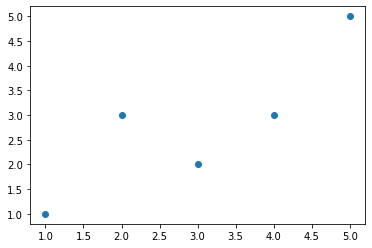

In [231]:
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])

plt.scatter(x, y)

y = b_0 + b_1 * x

Technically, b_0 is called the intercept because it determines where the line intercepts the y-axis. In machine learning we can call this the bias, because it it added to offset all predictions that we make. The b_1 term is called the slope because it defines the slope of the line or how x translates into a y value before we add our dias.

The goal is to find the bet estimates for the coefficients to minimize the errors in predicting y from x.

b_1 = sum((xi - mean(x)) * (yi - mean(y))) / sum((xi - mean(x))^2)

Where mean() is the average value for the variable in our dataset. The xi and yi refer to the fact that we need to repeat these calculations across all values in our dataset and i refers to the i'th value of x or y.

b_0 = mean(y) - b_0 * mean(x)

#### Estimating The Slope(b_1)

First we need to calculate the mean value of x and y.

1 / n * sum(x)

In [232]:
mean_x = 1 / len(x) * sum(x)

In [233]:
mean_x

3.0

1 / n * sum(y)

In [234]:
mean_y = 1 / len(y) * sum(y)

In [235]:
mean_y

2.8000000000000003

Now we need to calculate the error of each variable from the mean.

In [236]:
x - mean_x

array([-2., -1.,  1.,  0.,  2.])

In [237]:
y - mean_y

array([-1.8,  0.2,  0.2, -0.8,  2.2])

All we need to do is multiple the error for each x with the error for each y and calculate the sum of these multiplication. And Summing the result.

In [238]:
temp = sum((x - mean_x) * (y - mean_y))
temp

8.0

Now we need to calculate the bottom part of the equation for calculating b_1, or the denominator.

In [239]:
deno = sum((x - mean_x)**2)

In [240]:
deno

10.0

In [241]:
b_1 = temp / deno

In [242]:
b_1

0.8

#### Estimating The Intercept(b_0)

In [243]:
b_0 = mean_y - b_1 * mean_x

In [244]:
b_0

0.3999999999999999

#### Making Predictions

y = b_0 + b_1 * x

or

y = 0.4 + 0.8 * x

In [245]:
y_pred = b_0 + b_1 * x
y_pred

array([1.2, 2. , 3.6, 2.8, 4.4])

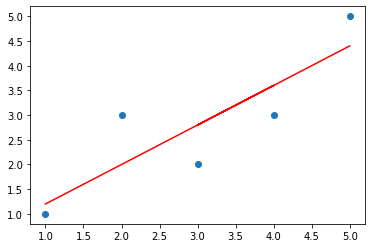

In [249]:
plt.scatter(x, y)
plt.plot(x, y_pred, color = "red")

#### Estimating Error

We can calculate a error for our predictions called the Root Mean Squared Error or RMSE.

RMSE = sqrt(sum((pi - yi)^2) / n)

Where sqrt() is the square root function, p is the predicted value and y is the actual value, i is the index for a specific instance, n is the number of predictions, because we must calculate the error across all predicted values.

First we must calculate the difference between each model prediction and the actual y values.

In [250]:
error = y_pred - y

In [251]:
error

array([ 0.2, -1. ,  0.6,  0.8, -0.6])

We can easily calculate the square of each of these error values.

In [267]:
rmse = np.sqrt(np.sum(error**2) / len(y_pred))

In [268]:
rmse

0.6928203230275509

Each prediction is on average wrong by about 0.692 units.